In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env, gamma=0.9, net_args={'hidden_dims': [64], 'activation': nn.Tanh})
learner.show_loss_every = 1000
viz = helpers.CartPoleViz(learner)
#viz = helpers.MountainCarViz(learner)


Creating FCNet with 4->2 dims for 4 observations and 2 actions


2165


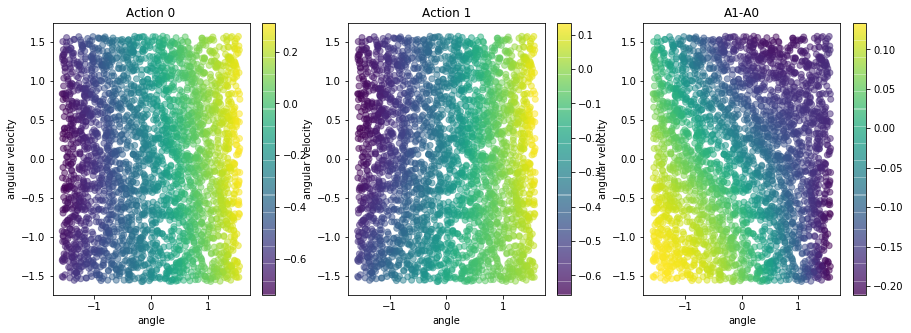

4446


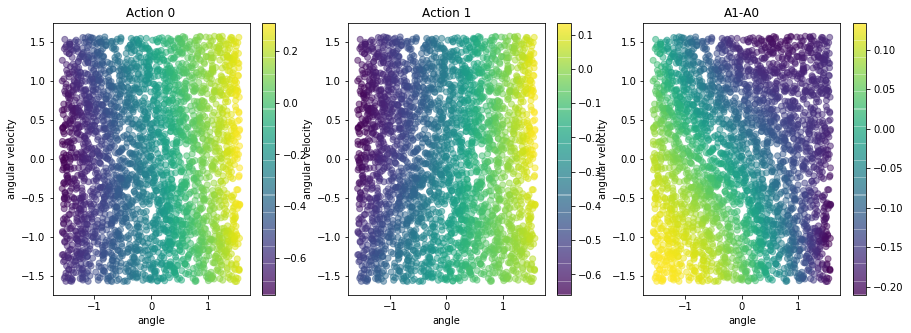

6704


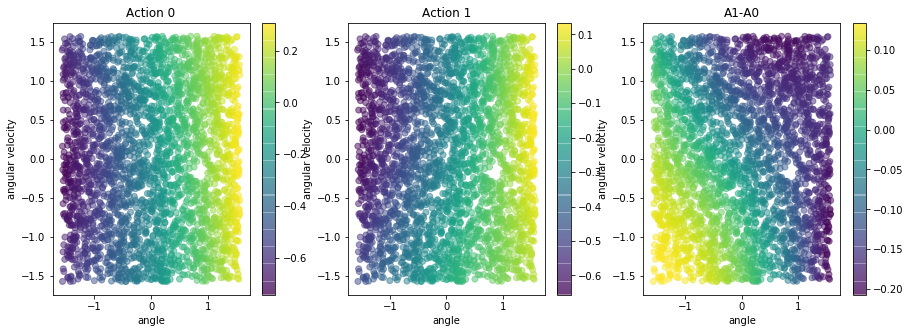

8958


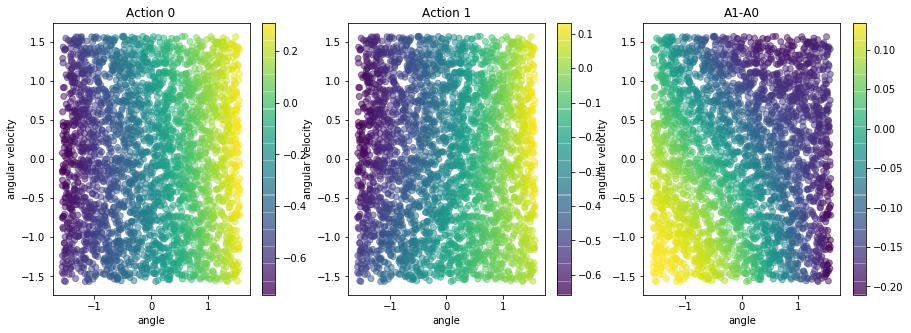

Loss = 0.55523
Loss = 0.43085
11093


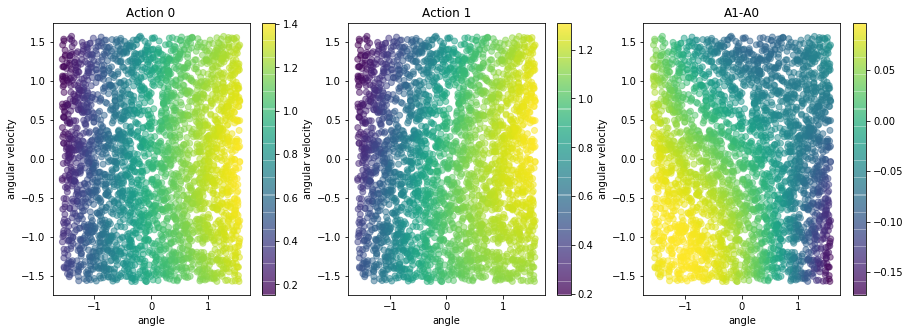

In [4]:
learner.eps = 1
for i in tqdm(range(500), "random warmup"):
    learner.rollout()
    if i % 100 == 99:
        print(len(learner._replay))
        viz.plot_q()



Eps = 1.00 on 1 of 5


Loss = 0.34414
Loss = 0.33570



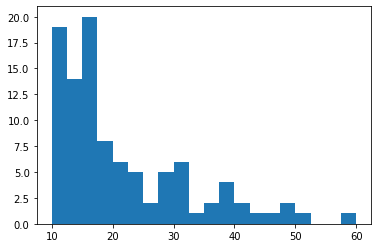

Reward mean,std = 21.270 +/- 10.834


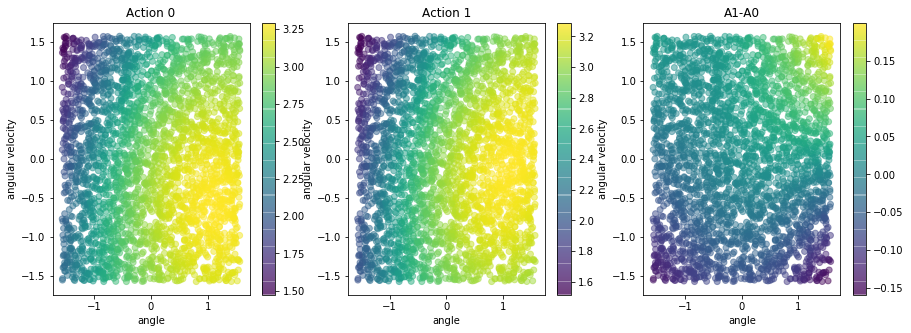



Eps = 0.82 on 2 of 5


Loss = 0.40009
Loss = 0.37737



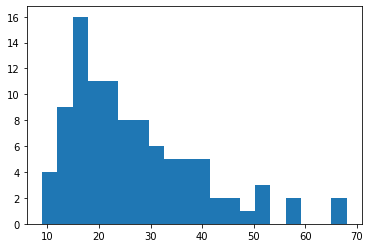

Reward mean,std = 26.570 +/- 12.878


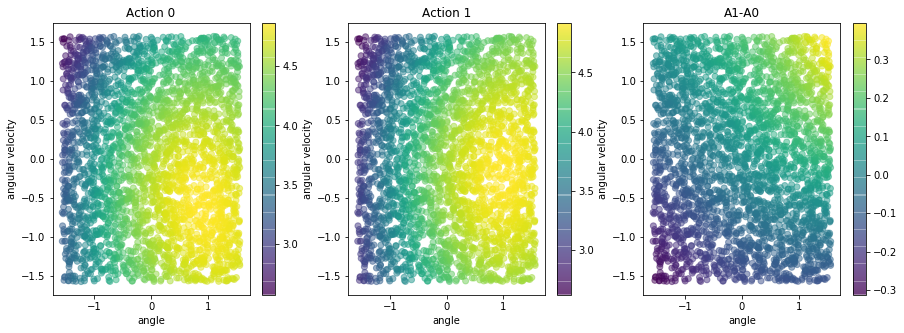



Eps = 0.64 on 3 of 5


Loss = 0.15987
Loss = 0.31802
Loss = 0.11665
Loss = 0.24059



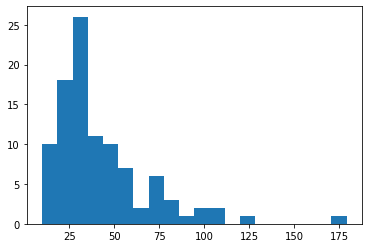

Reward mean,std = 42.670 +/- 27.355


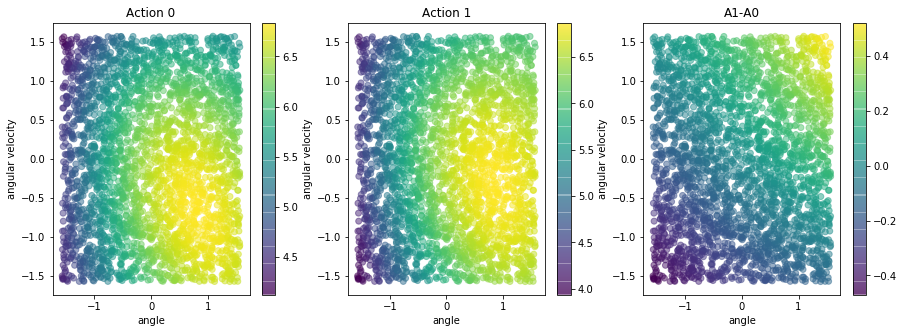



Eps = 0.45 on 4 of 5


Loss = 0.07782
Loss = 0.05967
Loss = 0.19362
Loss = 0.38540
Loss = 0.38559
Loss = 0.20219
Loss = 0.03546



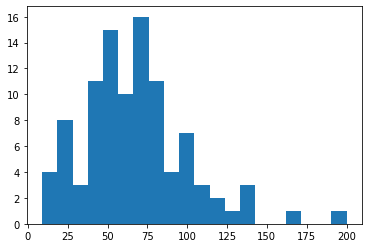

Reward mean,std = 67.270 +/- 33.159


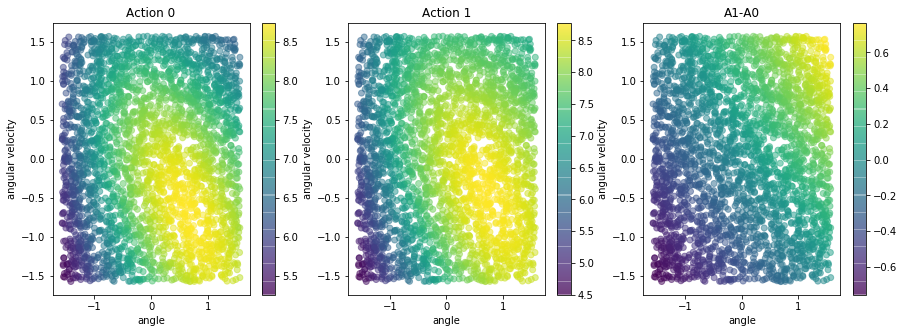



Eps = 0.27 on 5 of 5


Loss = 0.56275
Loss = 0.01518
Loss = 0.60755
Loss = 0.40996
Loss = 0.23683
Loss = 0.38836
Loss = 0.00976
Loss = 0.01315
Loss = 0.00973
Loss = 0.23266
Loss = 0.24620



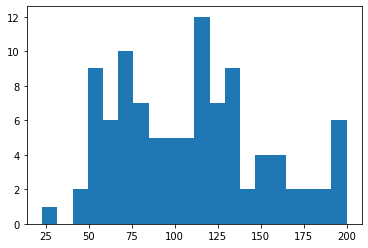

Reward mean,std = 110.020 +/- 42.793


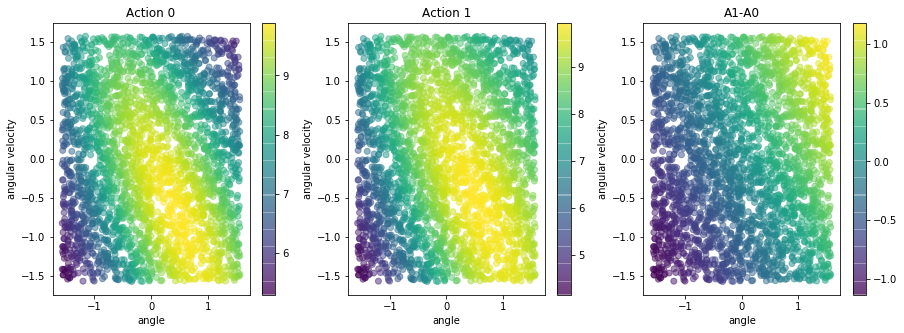

In [5]:
N = 5
for d in range(N):
    eps = 1.0 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    viz.plot_q()

Loss = 0.00401
Loss = 0.00564
Loss = 0.36637
Loss = 0.00475
Loss = 0.00386
Loss = 0.45983
Loss = 0.00370
Loss = 0.00245
Loss = 0.23584



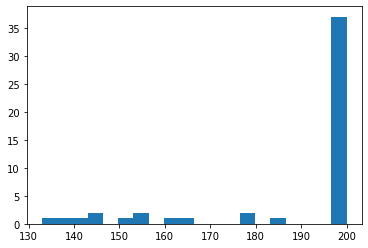

Reward mean,std = 188.500 +/- 20.902


In [10]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=50)

Loss = 0.25408



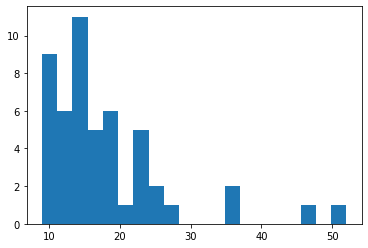

Reward mean,std = 18.020 +/- 8.735


In [11]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=50)

In [8]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    30.92ms/cyc @     1.0 calls/cyc
              do_learning:  90.1%    27.87ms/cyc @    38.0 calls/cyc
                optimizer:  51.3%    15.86ms/cyc @    28.7 calls/cyc
                   sample:  13.9%     4.30ms/cyc @    28.7 calls/cyc
                 q_target:  10.4%     3.21ms/cyc @    28.7 calls/cyc


In [9]:
learner.eps=0
learner.rollout(render=True)

(199, 200.0)